# Lab 1: Базові алгоритми класифікації з використанням бібліотеки Scikit-learn

Виконати наступне: 
1) Завантажити дані, вивести назви колонок і розмір датасета

2) Опрацювати пропуски (по можливості заповнити їх або видалити)

3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

4) Нормалізувати дані

5) Провести навчання наступних класифікаторів:
kNN
дерево ухвалення рішень
SVM
Random Forest
AdaBoost

Підібрати оптимальні параметри
• для kNN
• для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

Серед обраних оптимальних моделей кожного класу вибрати найкращу.

Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix


In [2]:
#1 

import pandas as pd

data = pd.read_csv("jobclassinfo2.csv")

In [3]:
data

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,15,Systems Analyst,62,Systems Analyst I,3,1,1,1,2,1,1,1,PG03
62,63,15,Systems Analyst,63,Systems Analyst II,5,4,1,3,3,4,3,4,PG05
63,64,15,Systems Analyst,64,Systems Analyst III,6,5,2,4,4,5,7,5,PG06
64,65,15,Systems Analyst,65,Systems Analyst IV,8,5,5,6,5,6,7,7,PG08


In [4]:
data.shape

(66, 14)

In [5]:
data.columns

Index(['ID', 'JobFamily', 'JobFamilyDescription', 'JobClass',
       'JobClassDescription', 'PayGrade', 'EducationLevel', 'Experience',
       'OrgImpact', 'ProblemSolving', 'Supervision', 'ContactLevel',
       'FinancialBudget', 'PG'],
      dtype='object')

In [6]:
#2

data.isna().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [7]:
data['PG'].value_counts()

PG05    15
PG06     7
PG08     7
PG03     7
PG04     7
PG10     6
PG09     6
PG02     5
PG07     4
PG01     2
Name: PG, dtype: int64

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat_name in ['JobFamilyDescription','JobClassDescription','PG']: 
    data[feat_name] = le.fit_transform(data[feat_name])
data.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,0,1,0,5,3,1,3,3,4,3,5,4
1,2,1,0,2,1,6,4,1,5,4,5,7,7,5
2,3,1,0,3,2,8,4,2,6,5,6,7,10,7
3,4,1,0,4,3,10,5,5,6,6,7,8,11,9
4,5,2,1,5,4,1,1,0,1,1,1,1,1,0


<Axes: >

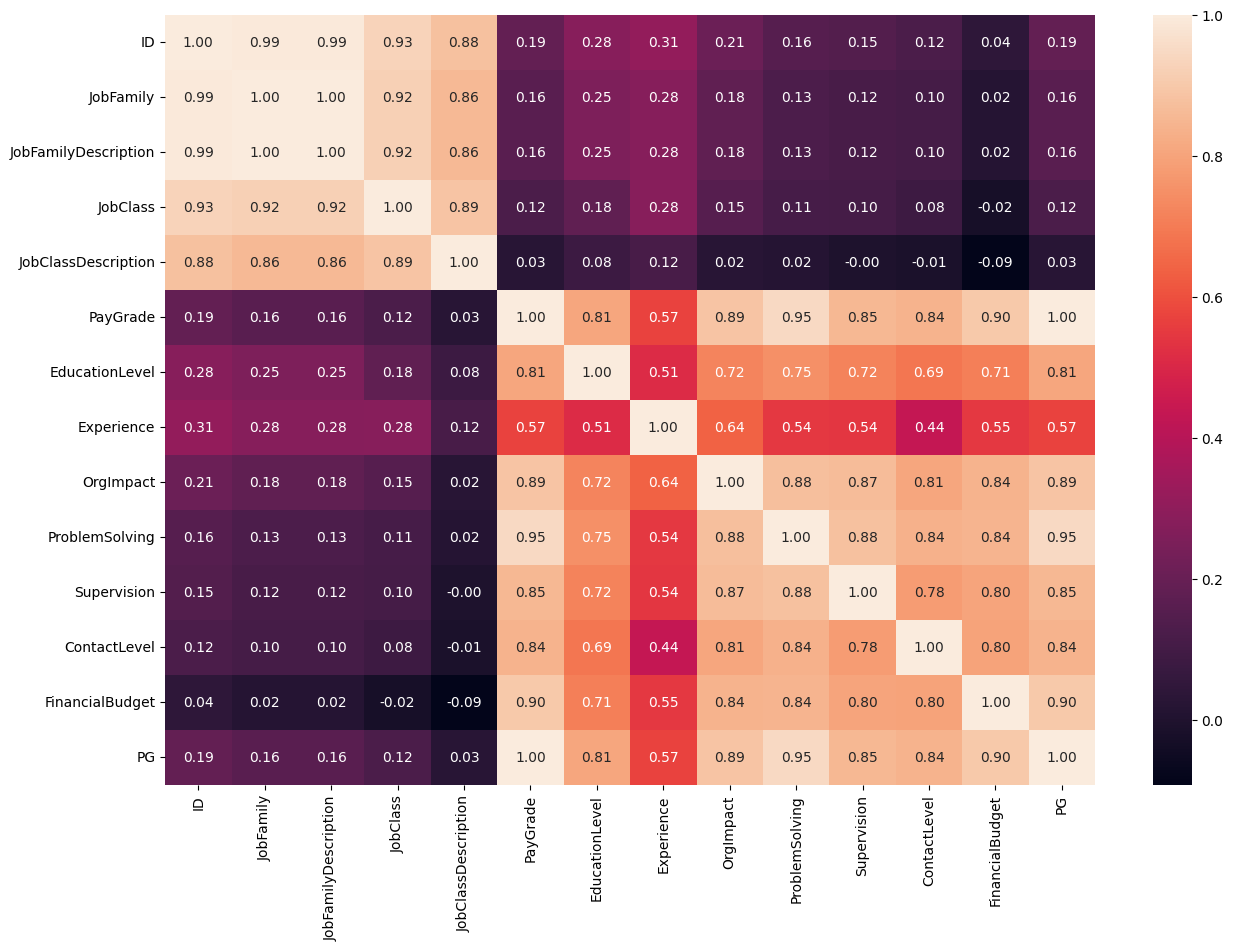

In [9]:
#3 

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f")

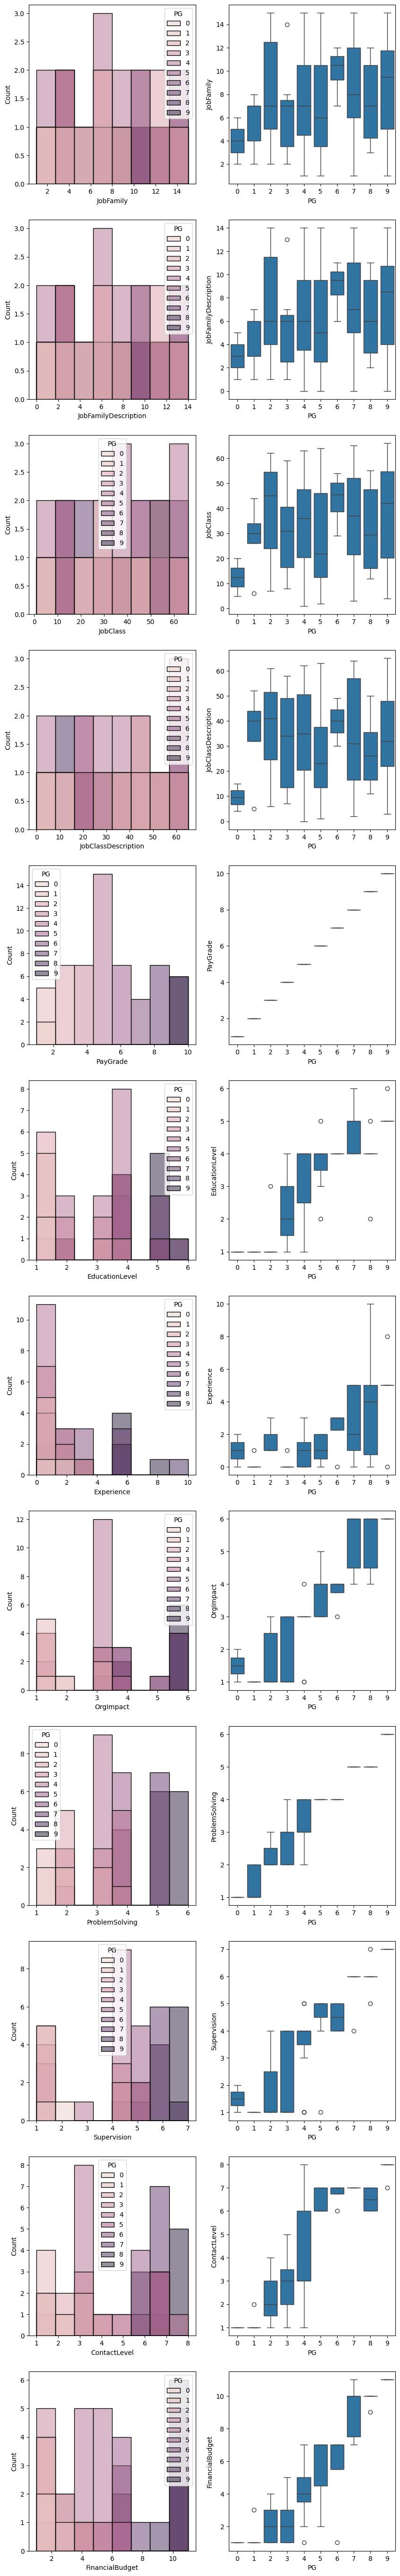

In [10]:
features = data.drop(['ID','PG'],axis=1).columns

plt.rcParams['figure.figsize'] = [10, 70]

fig, axs = plt.subplots(data.shape[1]-2, 2)
for n in range(0, data.shape[1]-2):
    sns.histplot(data=data, x =features[n],hue="PG", ax = axs[n,0])
    sns.boxplot(data=data, y =features[n],x="PG", ax = axs[n,1])

In [11]:
#4

X = data[features].values
y = data['PG'].values

scaler = preprocessing.MinMaxScaler()
X_std = scaler.fit_transform(X)

In [12]:
#5
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,stratify=y)

In [13]:
import numpy as np 
int(np.sqrt(X_train.shape[0]))

6

Text(0, 0.5, 'Error Rate')

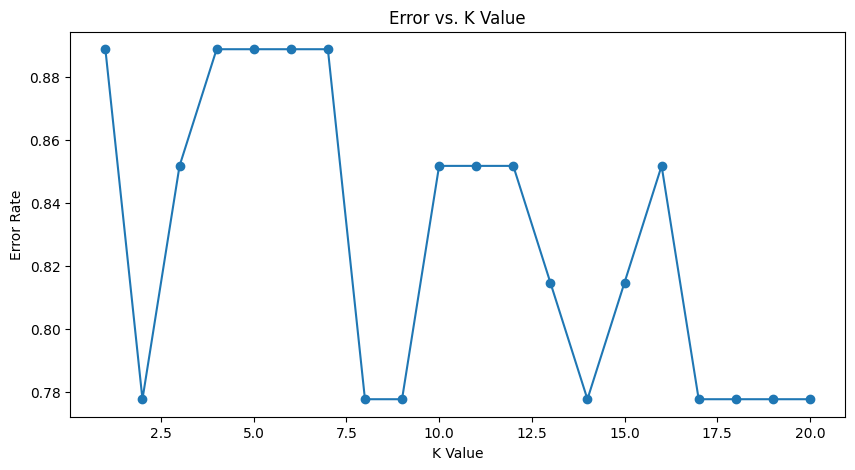

In [14]:
#knn


k_b = int(np.sqrt(X_train.shape[0]))

error = []
k_val = []
for i in range(1,k_b+15,1):
    knn_cls = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    pred_i = knn_cls.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    k_val.append(i)
    
plt.figure(figsize=(10,5))
plt.plot(k_val,error, marker="o")
plt.title("Error vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [15]:
error[np.argmin(error)]

0.7777777777777778

In [16]:
k = np.argmin(error)+1

In [17]:
k

2

In [18]:
knn_cls = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

In [19]:
#svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

SVC(C=0.1, gamma=1)


In [20]:
svm_cls = SVC(C=100, gamma=0.001).fit(X_train, y_train)

In [21]:
#DS, RF, Ada

DS_cls = DecisionTreeClassifier().fit(X_train,y_train)
RF_cls = RandomForestClassifier().fit(X_train,y_train)
AdaBoost_cls = AdaBoostClassifier().fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.50      0.40         2
           2       0.20      0.33      0.25         3
           3       0.00      0.00      0.00         3
           4       0.38      0.50      0.43         6
           5       0.20      0.33      0.25         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2

    accuracy                           0.22        27
   macro avg       0.11      0.17      0.13        27
weighted avg       0.15      0.22      0.18        27



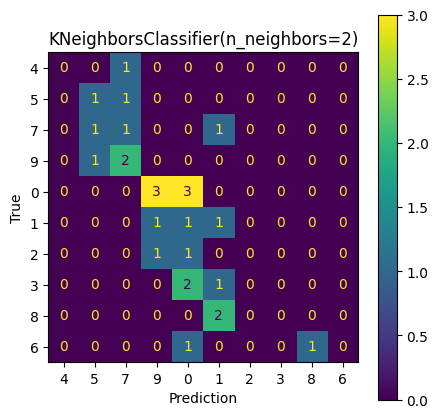

SVC(C=100, gamma=0.001)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.17      0.33      0.22         3
           3       0.17      0.33      0.22         3
           4       0.50      0.33      0.40         6
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         2
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2

    accuracy                           0.30        27
   macro avg       0.30      0.25      0.26        27
weighted avg       0.35      0.30      0.31        27



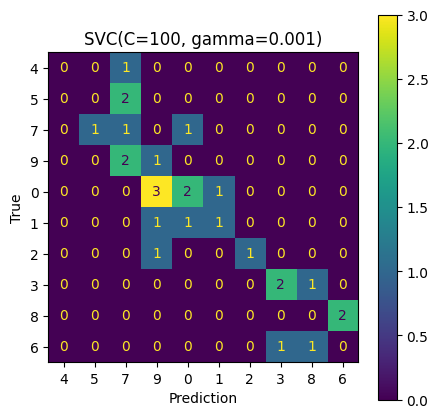

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      0.50      0.67         2
           9       0.67      1.00      0.80         2

    accuracy                           0.93        27
   macro avg       0.92      0.90      0.88        27
weighted avg       0.96      0.93      0.92        27



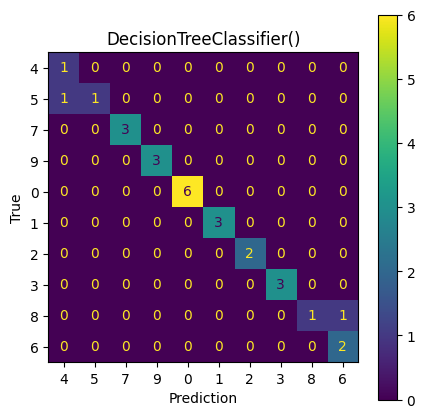

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.50      0.40         2
           2       0.67      0.67      0.67         3
           3       0.67      0.67      0.67         3
           4       0.83      0.83      0.83         6
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2

    accuracy                           0.74        27
   macro avg       0.70      0.68      0.68        27
weighted avg       0.75      0.74      0.74        27



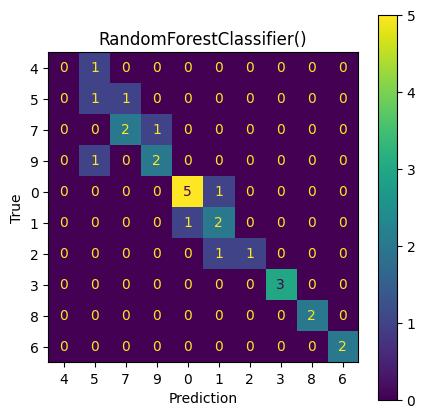

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.43      1.00      0.60         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.30      1.00      0.46         3
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         2

    accuracy                           0.44        27
   macro avg       0.27      0.40      0.31        27
weighted avg       0.24      0.44      0.30        27



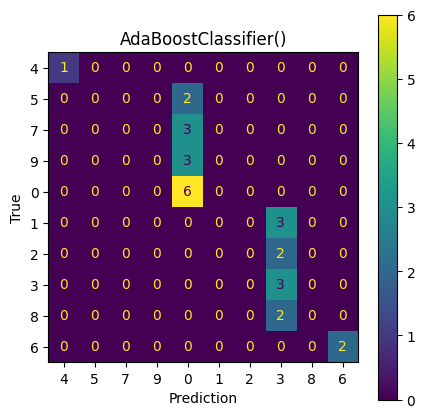

In [22]:
#report and cm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 


for cls in [knn_cls, svm_cls,DS_cls,RF_cls,AdaBoost_cls]:
    y_pred = cls.predict(X_test)
    print(cls)
    print(classification_report(y_test, y_pred))
    
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=data['PG'].unique())
    fig, ax = plt.subplots(figsize=(5,5))
    cmd_obj.plot(ax=ax)
    cmd_obj.ax_.set(title= cls, xlabel='Prediction', ylabel='True')
    plt.show()


Best model DecisionTreeClassifier

accuracy=0.93